In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from seaborn import heatmap
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [59]:
df = pd.read_csv("houses_sub.csv")

In [60]:
df.describe()
df.head()

,Unnamed: 0,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,GarageArea,YrSold,LotShape,LotConfig,SalePrice
0,0,8450,7,5,2003,2003,1710,2,3,1,548,2008,Reg,Inside,208500
1,1,9600,6,8,1976,1976,1262,2,3,1,460,2007,Reg,FR2,181500
2,2,11250,7,5,2001,2002,1786,2,3,1,608,2008,IR1,Inside,223500
3,3,9550,7,5,1915,1970,1717,1,3,1,642,2006,IR1,Corner,140000
4,4,14260,8,5,2000,2000,2198,2,4,1,836,2008,IR1,FR2,250000


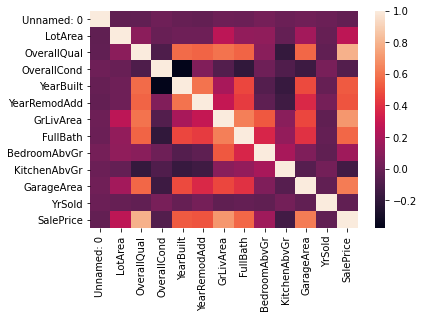

In [61]:
corr = df.corr()
hp = heatmap(corr)

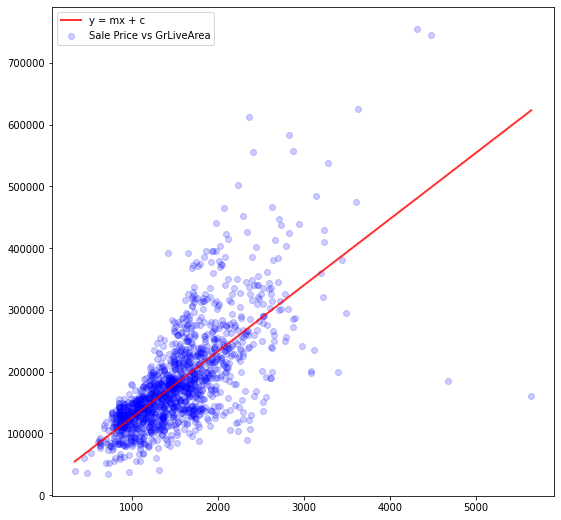

In [62]:
#we can see the lot area and sale price have high correlation 
#we will focus lot area as our independent variable and sale price as the dependent variable 

figure = plt.figure(figsize = (9,9))
x = np.array(df['GrLivArea']).reshape(-1,1)
y = np.array(df['SalePrice']).reshape(-1,1)

plt.scatter(x, y, color = 'blue', label = "Sale Price vs GrLiveArea", alpha = 0.2)

lr = LinearRegression()

model = lr.fit(x,y)

c = model.intercept_

y1 = model.coef_*(x.min()) + c
y2 = model.coef_*(x.max()) + c 

x_arr = np.array([x.min(), x.max()]).reshape(-1,1)
y_arr = np.array([y1, y2]).reshape(-1,1)




plt.plot(x_arr, y_arr, color = 'red', alpha = 0.8, label = "y = mx + c ", linewidth = 2)
plt.legend(loc = "upper left")
print("")

In [63]:
print("Correlation: ", model.score(x,y))
print(f"y = {model.coef_}x + {model.intercept_} ")

Correlation:  0.5021486502718042
y = [[107.13035897]]x + [18569.02585649] 


Equation: [13330.29344492] + x[[110.26434426]]
Mean Squared Error: 3913788296.4027987
Mean Absolute Error: 39364.76724953735


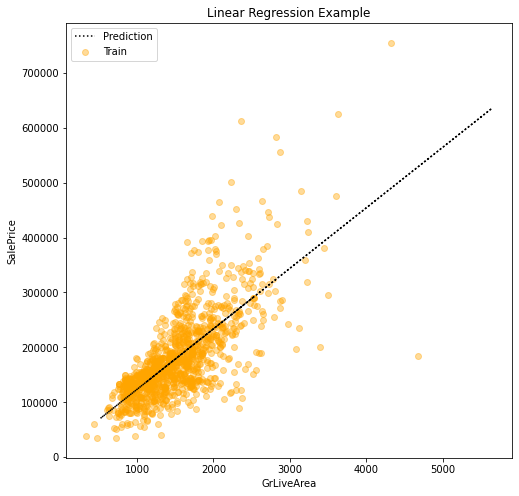

In [120]:
x = np.array(df['GrLivArea']).reshape(-1,1)
y = np.array(df['SalePrice']).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

lr = LinearRegression()

model = lr.fit(x_train, y_train)

print(f"Equation: {model.intercept_} + x{model.coef_}")

y_pred = model.predict(x_test)

figure = plt.figure(figsize = (8, 8 ))

plt.scatter(x_train, y_train, color = "orange", alpha = 0.4, label = "Train")
plt.plot(x_test, y_pred, color = 'black', linestyle = "dotted", label = "Prediction")
plt.title("Linear Regression Example")
plt.legend(loc = "upper left")
plt.xlabel("GrLiveArea")
plt.ylabel("SalePrice")

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")


In [117]:
print(f'Train Score: {model.score(x_train, y_train)}')
print(f'Test Score: {model.score(x_test, y_test)}')

predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
predictions.head()

Train Score: 0.5208603079630345
Test Score: 0.433264794803935


,Actual,Predicted
0,200624,290645.119259
1,133000,187327.428687
2,110000,145978.299590
3,192000,236284.797539
4,88000,133738.957377


In [101]:
url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'
df_hw = pd.read_html(url, header=0, index_col=0)[1]

Equation = [[3.63248849]]x + [-119.67115424]
0.23073922914134626
0.32375305924232933


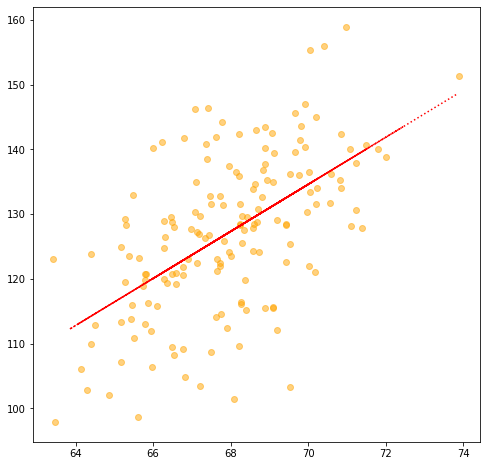

In [108]:
x = np.array(df_hw['Height(Inches)']).reshape(-1,1)
y = np.array(df_hw['Weight(Pounds)']).reshape(-1,1)

lr = LinearRegression() 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)

model = lr.fit(x_train, y_train)

print(f"Equation = {model.coef_}x + {model.intercept_}")

y_pred = model.predict(x_test)
plt.figure(figsize = (8,8))
plt.scatter(x_train, y_train, color = "orange", alpha = 0.5)
plt.plot(x_test, y_pred, color = "red", linestyle = "dotted")
